In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
TRAIN_DIR = "/content/drive/MyDrive/Train"
TEST_DIR = "/content/drive/MyDrive/Test"
BATCH_SIZE=64

In [9]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+'/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 0 in folder sad
For training data, found 0 in folder neutral
For training data, found 0 in folder happy
For training data, found 0 in folder angry


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 0 in folder angry
For testing data, found 0 in folder happy
For testing data, found 0 in folder neutral
For testing data, found 0 in folder sad


In [31]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as png

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = png.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [36]:
class_names = ['angry','happy','neutral','sad']

Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)
Image shape (182, 182, 3)


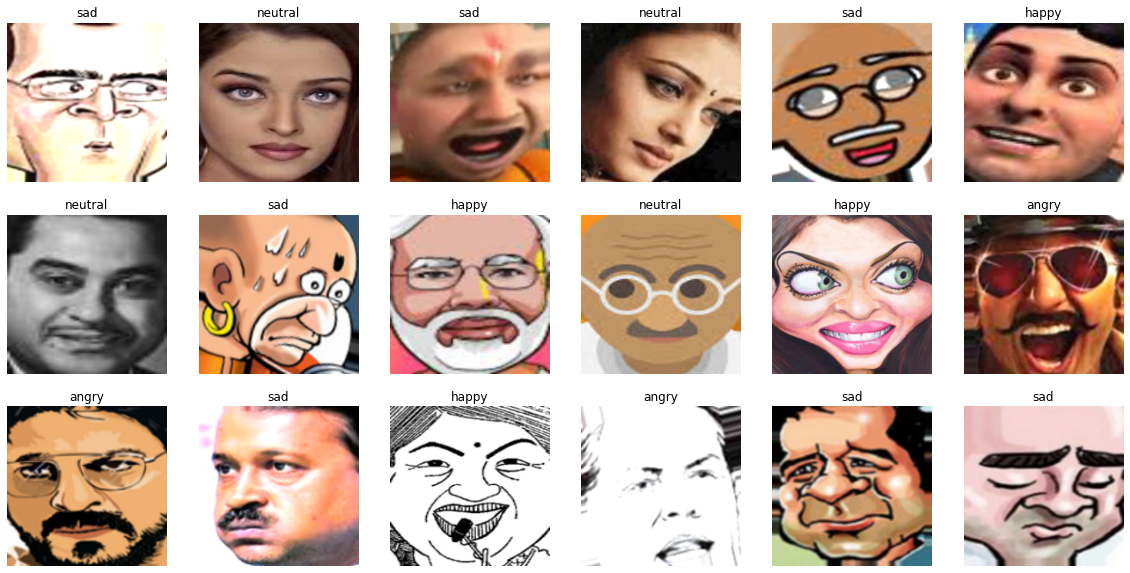

In [37]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/Train/", target_class=class_name)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (182, 182),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (182, 182),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 1810 images belonging to 4 classes.
Found 369 images belonging to 4 classes.


In [47]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (182, 182, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 182, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
## model summary
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 88, 88, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 61952)             0         
                                                                 
 dense_6 (Dense)             (None, 182)              